# Implementing Gradient Boosting 

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

import sklearn
import sklearn.utils
import sklearn.preprocessing


from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/home/pelin/anaconda3/envs/datascience/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Task 1: The GradientBoosting Regressor

Define the GradientBoostingRegressor class

<center>Implement the algorithm described in the lecture notes.</center>
<div>
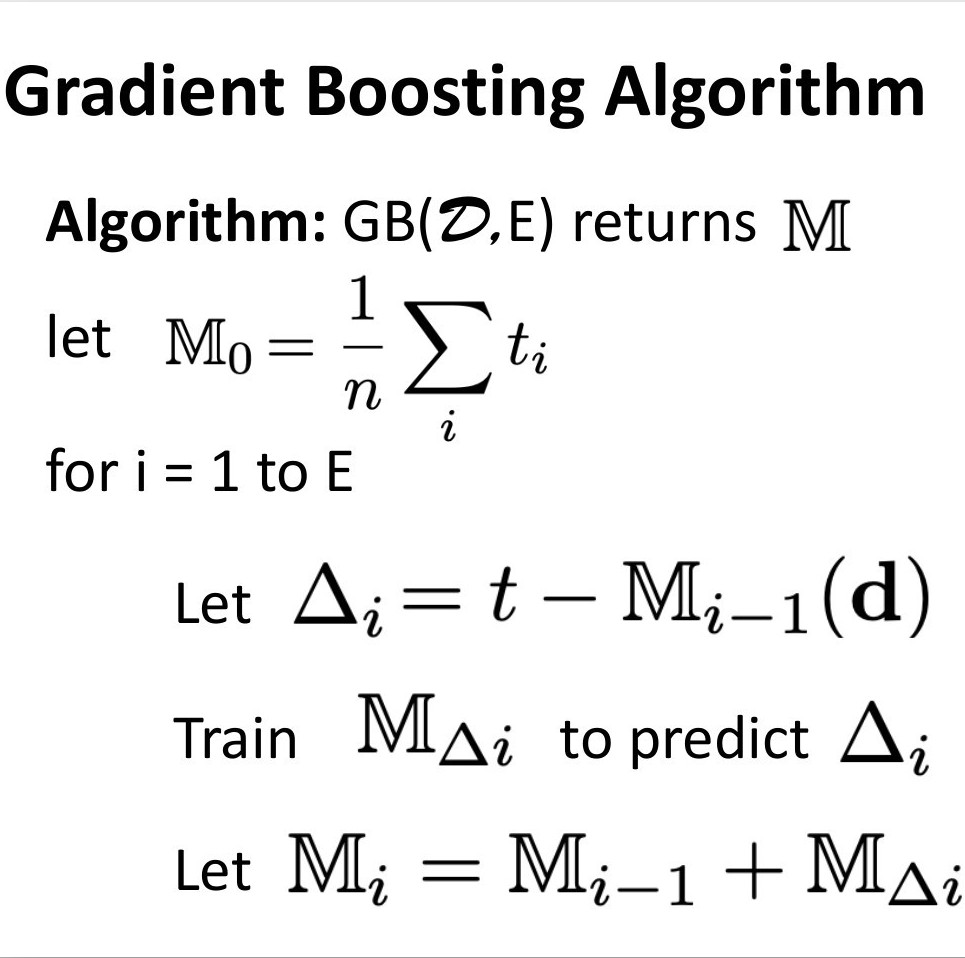
</div>

In [2]:
# Create a new regressor which is based on the sckit-learn BaseEstimator and RegressorMixin classes
class GradientBoostingRegressor(BaseEstimator, ClassifierMixin):
    """Parameters:
    Uses a collection of regression trees that trains on predicting the gradient of the loss function. 
    -----------
    n_estimators: int
        The number of classification trees that are used."""
    
    # Constructor for the regressor object
    def __init__(self, n_estimators=10):
        self.n_estimators = n_estimators
    
        # The fit function to train a regressor
    def fit(self, X, y):
        """Build a gradient boosting regressor"""    
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y) 
        
        #calculating the mean of target
        self.M0=y.mean()
        
        #storing first predictions with mean of the target M0(d)
        self.Md_=np.full((y.shape[0],),self.M0)
        
        #initializing a list to track loss
        self.loss=[]
        
        #calculating and storing first residuals(error) d(t-M0(d))
        self.error= y- self.Md_
        
        #calculating and storing loss (sum of squared error)
        self.loss.append((1/len(y)*0.5*np.sum(np.square(self.error))))
        
        #initializing a list to hold trees. 
        self.ensemble=[]
        
        #training a shallow decision tree to predict error and adding to ensemble
        self.ensemble.append(DecisionTreeRegressor(max_depth=2, random_state=1).fit(X,self.error))
        
        #predicting and storing error (M delta1(d))
        self.error_pred= self.ensemble[0].predict(X)
        
        #updating predictions 
        self.Md_+=self.error_pred
        
        # beginning gradient boosting 
        for i in range(1,self.n_estimators):
            #calculating and updating error deltas (t-M0(d))
            self.error=y-self.Md_
            
            #calculating and storing loss (sum of squared error)
            self.loss.append((1/len(y)*0.5*np.sum(np.square(self.error))))
            
            #training a shallow decision tree to predict error
            self.ensemble.append(DecisionTreeRegressor(max_depth=2, random_state=1).fit(X,self.error))
            
            #updating error predictions (M delta1(d))
            self.error_pred= self.ensemble[i].predict(X)
            
            #updating predictions 
            self.Md_+=self.error_pred
            
        # Return the regressor
        return self

    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        """Predict results of the input samples X."""
        
        # Check is fit had been called by confirming that the Md_ array has been set up
        check_is_fitted(self, ['Md_'])

        # Check that the input features match the type and shape of the training features
        X = check_array(X)
        
        #creating an array initializing to mean y of fitted model
        prediction=np.full((X.shape[0],),self.M0)
        
        for tree in self.ensemble:
            #making delta prediction
            error_pred=tree.predict(X)
            #updating predictions 
            prediction+=error_pred

        return prediction


## Task 2: Evaluation

### Load the Readability Dataset

In [3]:
# Add code here
file_name1="commonlitreadabilityprize_bow.csv"
file_name2="commonlitreadabilityprize_embedding.csv"
target_feature="target"

In [4]:
dataset1=pd.read_csv(file_name1, index_col=0)
dataset2=pd.read_csv(file_name2, index_col=0)

In [5]:
display(dataset1.head(2))
display(dataset1.shape)

,$,ability,able,absolutely,accompanied,accomplished,according,account,acid,act,...,year,years,yellow,yes,york,young,youth,°,id,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,c12129c31,-0.340259
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,85aa80a4c,-0.315372


(2834, 1828)

In [6]:
X1 = dataset1[dataset1.columns[:-2]]
y1 = dataset1[target_feature]

In [7]:
display(X1.head(2), X1.shape)
display(y1.head(2),y1.shape)

,$,ability,able,absolutely,accompanied,accomplished,according,account,acid,act,...,yard,yards,year,years,yellow,yes,york,young,youth,°
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(2834, 1826)

0   -0.340259
1   -0.315372
Name: target, dtype: float64

(2834,)

In [8]:
display(dataset2.head(2))
display(dataset2.shape)

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,id,target
0,0.054942,0.104693,-0.129839,-0.077362,0.066479,-0.007780,-0.010820,-0.054412,-0.069162,2.085748,...,0.059434,-0.093304,-0.134071,0.053603,0.038264,-0.028437,-0.022459,0.068514,c12129c31,-0.340259
1,-0.014731,0.213879,-0.183907,-0.048958,0.112992,0.026316,0.028143,-0.137892,-0.094396,2.170374,...,0.006578,-0.007093,0.065427,-0.029093,-0.000948,0.012834,0.015731,0.002224,85aa80a4c,-0.315372


(2834, 302)

In [9]:
X2 = dataset2[dataset2.columns[:-2]]
y2 = dataset2[target_feature]

In [10]:
display(X2.head(2), X2.shape)
display(y2.head(2),y2.shape)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.054942,0.104693,-0.129839,-0.077362,0.066479,-0.007780,-0.010820,-0.054412,-0.069162,2.085748,...,-0.238603,0.031822,0.059434,-0.093304,-0.134071,0.053603,0.038264,-0.028437,-0.022459,0.068514
1,-0.014731,0.213879,-0.183907,-0.048958,0.112992,0.026316,0.028143,-0.137892,-0.094396,2.170374,...,-0.105756,0.051830,0.006578,-0.007093,0.065427,-0.029093,-0.000948,0.012834,0.015731,0.002224


(2834, 300)

0   -0.340259
1   -0.315372
Name: target, dtype: float64

(2834,)

### Gradient Boosting Model Evaluation

Evaluate the performance of the Gradient Boosting Regressor on the CommonLit Readability Prize dataset.

In [11]:
# Define a Helper function to compute/print all our metrics
def printMetrics(actualVal, predictions):
    #classification evaluation measures
    print('\n==============================================================================')
    print("MAE: ", metrics.mean_absolute_error(actualVal, predictions))
    print("MSE: ", metrics.mean_squared_error(actualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(actualVal, predictions)**0.5)
    print("R²: ", metrics.r2_score(actualVal, predictions))

#### Bag of words representation

In [12]:
#Splitting the data into a training set and validation set
X1_train, X1_valid, y1_train, y1_valid \
    = sklearn.model_selection.train_test_split(X1, y1, 
                        #shuffle=True, 
                        train_size = 0.7)

In [13]:
display(X1_train.shape, y1_train.shape)
display(X1_valid.shape, y1_valid.shape)

(1983, 1826)

(1983,)

(851, 1826)

(851,)

In [14]:
#training the model at 20 epoch
myregressor1=GradientBoostingRegressor(20)
myregressor1.fit(X1_train, y1_train)

GradientBoostingRegressor(n_estimators=20)

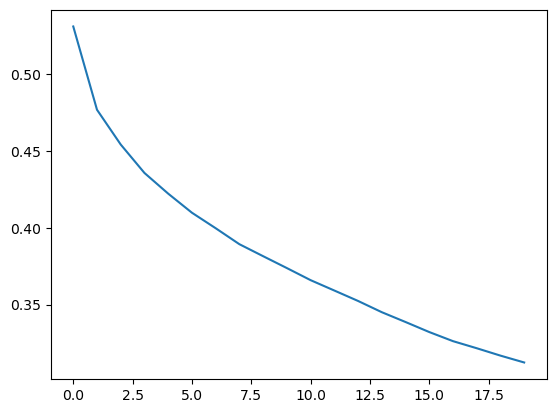

In [15]:
#Plotting loss
loss1=myregressor1.loss
plt.plot(loss1)

In [16]:
#making prediction on training dataset to ensure model didn't overfit the training data
y_pred1=myregressor1.predict(X1_train)

In [17]:
# Predicted scores for each example. 
actual_vs_predicted = pd.concat([y1_train, pd.DataFrame(y_pred1, columns=['Predicted'], index=y1_train.index)], axis=1)
# Show the first ten predictions vs actual values...
actual_vs_predicted.head(4)

,target,Predicted
1287,-0.985551,-0.743202
874,1.013469,-0.845755
155,-1.713306,-0.937661
2708,-2.371112,-1.271525


In [18]:
#printing metrics for training data
printMetrics(y1_train, y_pred1)


MAE:  0.6318671165036586
MSE:  0.616890387591904
RMSE:  0.7854236994080991
R²:  0.41917328522359387


In [19]:
#making prediction on validation data
y_pred1=myregressor1.predict(X1_valid)

In [20]:
# Predicted scores for each example. 
actual_vs_predicted = pd.concat([y1_valid, pd.DataFrame(y_pred1, columns=['Predicted'], index=y1_valid.index)], axis=1)
# Show the first 4 predictions vs actual values...
actual_vs_predicted.head(4)

,target,Predicted
980,0.052490,-0.520145
2064,-0.755870,1.401662
138,-0.876649,-0.081156
1873,0.831305,-0.593955


In [21]:
#printing metrics for validation data
printMetrics(y1_valid, y_pred1)


MAE:  0.7695703515454526
MSE:  0.923376633189927
RMSE:  0.960924884259913
R²:  0.14582615025184686


In [22]:
#testing with 10 k cross validation
cv_results_bov = sklearn.model_selection.cross_validate(myregressor1, X1, y1, cv=10, scoring="r2")
print(cv_results_bov)
print(f"Mean test score r2 {cv_results_bov['test_score'].mean()}")

{'fit_time': array([0.97148299, 0.94698715, 0.94198394, 0.94514036, 0.95526886,
       0.95059156, 0.93087864, 0.93563104, 0.94625258, 0.96008229]), 'score_time': array([0.02397752, 0.02397251, 0.02390409, 0.02420783, 0.02371883,
       0.02400923, 0.0239296 , 0.02380085, 0.02398801, 0.02394199]), 'test_score': array([-0.2775341 , -0.01439804, -0.16985574, -0.07750199, -0.12117365,
       -0.05804694,  0.37333708,  0.07654482, -0.46427414,  0.14818032])}
Mean test score r2 -0.058472238585018044


#### Sentence embedding representation

In [14]:
#Splitting the data into a training set and validation set
X2_train, X2_valid, y2_train, y2_valid \
    = sklearn.model_selection.train_test_split(X2, y2, 
                        #shuffle=True, 
                        train_size = 0.7)

In [15]:
display(X2_train.shape, y2_train.shape)
display(X2_valid.shape, y2_valid.shape)

(1983, 300)

(1983,)

(851, 300)

(851,)

In [25]:
#training the model at 10 epoch (with this data set model overfit at 20 epoch and accuracy on validation set decreased
# so in order to ensure model doesn't overfit training data this time setting epoch to 10)
myregressor2=GradientBoostingRegressor(10)
myregressor2.fit(X2_train, y2_train)

GradientBoostingRegressor()

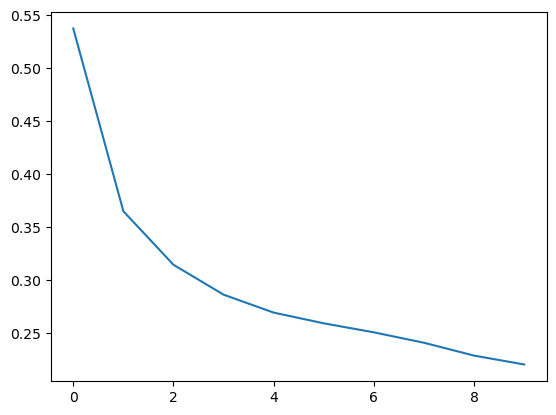

In [26]:
#Plotting loss
loss2=myregressor2.loss
plt.plot(loss2)

In [27]:
#making prediction on training dataset to ensure model didn't overfit the training data
y_pred2=myregressor2.predict(X2_train)

In [28]:
# Predicted scores for each example. 
actual_vs_predicted = pd.concat([y2_train, pd.DataFrame(y_pred2, columns=['Predicted'], index=y2_train.index)], axis=1)
# Show the first ten predictions vs actual values...
actual_vs_predicted.head(4)

,target,Predicted
62,-0.013471,-0.141243
829,0.025799,-0.541524
129,-0.007394,-0.419907
2431,-0.507022,-0.954553


In [29]:
#printing metrics for training data
printMetrics(y2_train, y_pred2)


MAE:  0.5190679663316577
MSE:  0.4263582906307597
RMSE:  0.6529611708446067
R²:  0.603557982402032


In [30]:
#making prediction on validation data
y_pred2=myregressor2.predict(X2_valid)

In [31]:
# Predicted scores for each example. 
actual_vs_predicted = pd.concat([y2_valid, pd.DataFrame(y_pred2, columns=['Predicted'], index=y2_valid.index)], axis=1)
# Show the first ten predictions vs actual values...
actual_vs_predicted.head(4)

,target,Predicted
375,-3.123762,-1.817157
2456,-0.938621,-0.806273
2052,0.345030,-0.120341
722,-0.984640,0.320699


In [32]:
#printing metrics for validation data
printMetrics(y2_valid, y_pred2)


MAE:  0.6219857798010993
MSE:  0.6144734333170226
RMSE:  0.7838835585193905
R²:  0.41428196498836


In [33]:
#testing with 10 k cross validation
cv_results_se = sklearn.model_selection.cross_validate(myregressor2, X2, y2, cv=10, scoring="r2")
print(cv_results_se)
print(f"Mean test score r2 {cv_results_se['test_score'].mean()}")

{'fit_time': array([1.78096938, 1.78235912, 1.7727356 , 1.78279424, 1.77990294,
       1.77478099, 1.76648808, 1.78081942, 1.77061987, 1.76980114]), 'score_time': array([0.00420141, 0.00408173, 0.0041697 , 0.00431085, 0.0041821 ,
       0.00411034, 0.00402713, 0.0040555 , 0.00418282, 0.00394964]), 'test_score': array([ 0.01104346,  0.19097907,  0.21152442,  0.41119093,  0.18861208,
        0.42362657,  0.63856723,  0.43058525, -0.01904535,  0.52006993])}
Mean test score r2 0.30071535686870976


As the result, sentence embedding representation gives much better performance. For models trained on both representation, while the epochs are high at around 500 we can archeive almost 99 percent r2 while making predictions on training dataset. However because models easily overfit training data at high epochs models prediction accuracy at validation dataset greatly decrease and I end up with 0 percent r2 on validation data. Same happens when individual tree's max_dept increase model easily overfits training data and greatly fails to perform well on validation data. Therefore I set max_dept to 2 to ensamble shallow trees. 

### Scikit-learn Model Performance
Evaluate the performance of the a scitkit-learn regressor on the CommonLit Readability Prize dataset.

#### Bag of words representation

In [34]:
from sklearn.ensemble import AdaBoostRegressor
myregressor3 = AdaBoostRegressor(random_state=0, n_estimators=10, loss='square')

In [35]:
myregressor3.fit(X1_train, y1_train)

AdaBoostRegressor(loss='square', n_estimators=10, random_state=0)

In [36]:
#making prediction on validation data
y_pred3=myregressor3.predict(X1_valid)
#printing metrics for validation data
printMetrics(y1_valid, y_pred3)


MAE:  0.7884123890714514
MSE:  0.9453090070419179
RMSE:  0.9722700278430463
R²:  0.12553750579855216


In [28]:
# referance: https://www.kaggle.com/code/paulh2718/gradientboostingregressor-gridsearchcv
from sklearn.model_selection import RepeatedKFold
cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

In [38]:
param_grid ={'n_estimators':[10, 50, 100, 500],\
            'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],\
            'loss':['square']}

# Perform the search
tuned_adaboost_bov = GridSearchCV(AdaBoostRegressor(), \
                            param_grid, cv=cv, verbose = 2, \
                            scoring="r2", n_jobs = -1, refit="r2")

In [39]:
tuned_adaboost_bov.fit(X1, y1)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/home/pelin/anaconda3/envs/datascience/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/pelin/anaconda3/envs/datascience/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/pelin/anaconda3/envs/datascience/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/pelin/anaconda3/envs/datascience/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this vers

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=1),
             estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'loss': ['square'],
                         'n_estimators': [10, 50, 100, 500]},
             refit='r2', scoring='r2', verbose=2)

In [40]:
# Print details
print("Best parameters set found on development set:")
display(tuned_adaboost_bov.best_params_)
display(tuned_adaboost_bov.best_score_)

Best parameters set found on development set:


{'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 50}

0.1485302320798012

#### Sentence embedding representation

In [41]:
myregressor4 = AdaBoostRegressor(random_state=0, n_estimators=10, loss='square')

In [42]:
myregressor4.fit(X2_train, y2_train)

AdaBoostRegressor(loss='square', n_estimators=10, random_state=0)

In [43]:
#making prediction on validation data
y_pred4=myregressor4.predict(X2_valid)
#printing metrics for validation data
printMetrics(y2_valid, y_pred4)


MAE:  0.6188128407824587
MSE:  0.6007349872093443
RMSE:  0.775070956241649
R²:  0.427377495603678


In [44]:
param_grid ={'n_estimators':[10, 50, 100, 500],\
            'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],\
            'loss':['square']}

# Perform the search
tuned_adaboost_se = GridSearchCV(AdaBoostRegressor(), \
                            param_grid, cv=cv, verbose = 2, \
                            scoring="r2", n_jobs = -1, refit="r2")

In [45]:
tuned_adaboost_se.fit(X2, y2)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=1),
             estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'loss': ['square'],
                         'n_estimators': [10, 50, 100, 500]},
             refit='r2', scoring='r2', verbose=2)

In [46]:
# Print details
print("Best parameters set found on development set:")
display(tuned_adaboost_se.best_params_)
display(tuned_adaboost_se.best_score_)

Best parameters set found on development set:


{'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 500}

0.5589636642535792

## Task 3 & 4: Add Subsampling and Learning Rate

Re-implement the GradientBoostingRegressor class adding subsampling and a learning rate as options. 

In [18]:
class GradientBoostingRegressor(BaseEstimator, ClassifierMixin):
    """Parameters:
    Uses a collection of regression trees that trains on predicting the gradient of the loss function. 
    -----------
    n_estimators: int
        The number of classification trees that are used."""
    
    # Constructor for the regressor object
    def __init__(self, n_estimators=10, subsample=False, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.subsample=subsample
        self.learning_rate= learning_rate
    
        # The fit function to train a regressor
    def fit(self, X, y):
        """Build a gradient boosting regressor"""     
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        
        # Set up the random number generator to be used for sampling without replacement
        self.random_state_ = check_random_state(0)
        
        #choising subsample size, 
        ## if subsample=True;
        ### size of each subsample will be equal to 70% of dataset 
        ## else;
        ### all samples in dataset will be used in each decision tree. 
        
        #sampling row indexes for first prediction
        if self.subsample==True:
            row_index0=self.random_state_.choice(y.shape[0],round(y.shape[0]), replace=True)
        else: 
            row_index0=np.asarray([x for x in range(y.shape[0])])
        
        #calculating the mean of target
        self.M0=y[row_index0].mean()
        
        #storing first predictions with mean of the target M0(d)
        self.Md_=np.full((row_index0.shape[0],),self.M0)
        
        #initializing a list to track loss
        self.loss=[]
        
        #calculating and storing first residuals(error) d(t-M0(d))
        self.error= y[row_index0]- self.Md_
        
        #calculating and storing loss (sum of squared error)
        self.loss.append((1/len(y[row_index0])*0.5*np.sum(np.square(self.error))))
        
        #initializing a list to hold trees. 
        self.ensemble=[]
        
        #training a shallow decision tree to predict error and adding to ensemble
        self.ensemble.append(DecisionTreeRegressor(max_depth=2, random_state=1).fit(X[row_index0],self.error))
        
        #predicting and storing error (M delta1(d))
        self.error_pred= self.ensemble[0].predict(X[row_index0])
        
        #updating predictions 
        self.Md_+=self.error_pred*self.learning_rate
        
        # beginning gradient boosting 
        for i in range(1,self.n_estimators):
            
            # Set up the random number generator to be used for sampling without replacement
            self.random_state_ = check_random_state(i)
            
            #sampling row indexes for prediction
            if self.subsample==True:
                row_index=self.random_state_.choice(y.shape[0],round(y.shape[0]), replace=True)
            else: 
                row_index=np.asarray([x for x in range(y.shape[0])])
            
            #calculating and updating error deltas (t-M0(d))
            self.error=y[row_index]-self.Md_
            
            #calculating and storing loss (sum of squared error)
            self.loss.append((1/len(y[row_index])*0.5*np.sum(np.square(self.error))))
            
            #training a shallow decision tree to predict error
            self.ensemble.append(DecisionTreeRegressor(max_depth=2, random_state=1).fit(X[row_index],self.error))
            
            #updating error predictions (M delta1(d))
            self.error_pred= self.ensemble[i].predict(X[row_index])
            
            #updating predictions 
            self.Md_+=self.error_pred*self.learning_rate
            
        # Return the regressor
        return self

    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        """Predict results of the input samples X."""
        
        # Check is fit had been called by confirming that the Md_ array has been set up
        check_is_fitted(self, ['Md_'])

        # Check that the input features match the type and shape of the training features
        X = check_array(X)
        
        #creating an array initializing to mean y of fitted model
        prediction=np.full((X.shape[0],),self.M0)
        
        for tree in self.ensemble:
            #making delta prediction
            error_pred=tree.predict(X)
            #updating predictions 
            prediction+=error_pred*self.learning_rate

        return prediction


In [51]:
#checking if model works with learning rate and subsampling 
myregressor5=GradientBoostingRegressor(1000,subsample=True, learning_rate=0.001)
myregressor5.fit(X2_train, y2_train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=1000,
                          subsample=True)

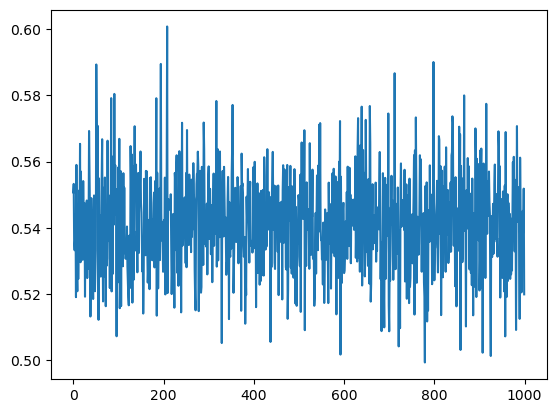

In [52]:
#Plotting loss
loss5=myregressor5.loss
plt.plot(loss5)

In [53]:
y_pred5=myregressor5.predict(X2_train)
#printing metrics for validation data
printMetrics(y2_train, y_pred5)


MAE:  0.661292342934507
MSE:  0.6701651446333464
RMSE:  0.8186361491122576
R²:  0.3809321662932337


In [54]:
y_pred5=myregressor5.predict(X2_valid)
#printing metrics for validation data
printMetrics(y2_valid, y_pred5)


MAE:  0.6663379988405306
MSE:  0.7005368095209856
RMSE:  0.836980770102268
R²:  0.3203901441517335


In [23]:
#checking if model works with learning rate without subsampling
myregressor6=GradientBoostingRegressor(250, learning_rate=0.05)
myregressor6.fit(X2_train, y2_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=250)

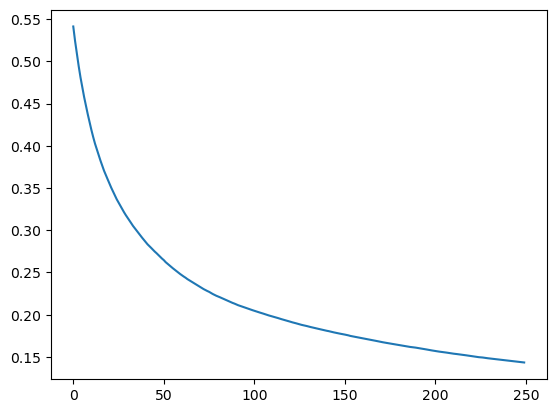

In [24]:
#Plotting loss
loss6=myregressor6.loss
plt.plot(loss6)

In [25]:
y_pred6=myregressor6.predict(X2_train)
#printing metrics for validation data
printMetrics(y2_train, y_pred6)


MAE:  0.42791137091840725
MSE:  0.2864466292626333
RMSE:  0.5352070900713417
R²:  0.7353937373940233


In [26]:
y_pred6=myregressor6.predict(X2_valid)
#printing metrics for validation data
printMetrics(y2_valid, y_pred6)


MAE:  0.5365386319163401
MSE:  0.46823744125363304
RMSE:  0.6842787745163758
R²:  0.5457500938876645


## Task 5: Hyperparameter Tuning

Perform hyper-parameter tuning and evaluate models. 

#### Bag of words representation

In [29]:
param_grid ={'n_estimators':[10, 50, 100, 500, 1000,1500,2000],\
            'subsample':[True, False],
            'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

# Perform the search
tuned_regressor_bov = GridSearchCV(GradientBoostingRegressor(), \
                            param_grid, cv=cv, verbose = 2, \
                            scoring="r2", n_jobs = -1, refit="r2")

In [30]:
tuned_regressor_bov.fit(X1, y1)

Fitting 10 folds for each of 70 candidates, totalling 700 fits


/home/pelin/anaconda3/envs/datascience/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/pelin/anaconda3/envs/datascience/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/pelin/anaconda3/envs/datascience/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/pelin/anaconda3/envs/datascience/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this vers

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=1),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500, 1000, 1500, 2000],
                         'subsample': [True, False]},
             refit='r2', scoring='r2', verbose=2)

In [31]:
# Print details
print("Best parameters set found on development set:")
display(tuned_regressor_bov.best_params_)
display(tuned_regressor_bov.best_score_)

Best parameters set found on development set:


{'learning_rate': 0.1, 'n_estimators': 1000, 'subsample': False}

0.36077463030316703

#### Sentence embedding representation

In [32]:
param_grid ={'n_estimators':[10, 50, 100, 500,1000,1500,2000],\
            'subsample':[True, False],
            'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

# Perform the search
tuned_regressor_se = GridSearchCV(GradientBoostingRegressor(), \
                            param_grid, cv=cv, verbose = 2, \
                            scoring="r2", n_jobs = -1, refit="r2")

In [33]:
tuned_regressor_se.fit(X2, y2)

Fitting 10 folds for each of 70 candidates, totalling 700 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=1),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500, 1000, 1500, 2000],
                         'subsample': [True, False]},
             refit='r2', scoring='r2', verbose=2)

In [34]:
# Print details
print("Best parameters set found on development set:")
display(tuned_regressor_se.best_params_)
display(tuned_regressor_se.best_score_)

Best parameters set found on development set:


{'learning_rate': 0.1, 'n_estimators': 500, 'subsample': False}

0.5934392784284753

[CV] END learning_rate=0.0001, n_estimators=10, subsample=True; total time=   5.8s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=False; total time=  21.9s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=True; total time= 1.1min
[CV] END learning_rate=0.0001, n_estimators=500, subsample=False; total time= 3.7min
[CV] END learning_rate=0.0001, n_estimators=1000, subsample=False; total time= 6.5min
[CV] END learning_rate=0.0001, n_estimators=1500, subsample=True; total time=11.0min
[CV] END learning_rate=0.0001, n_estimators=2000, subsample=True; total time=15.9min
[CV] END learning_rate=0.001, n_estimators=100, subsample=True; total time=  41.9s
[CV] END learning_rate=0.001, n_estimators=100, subsample=False; total time=  32.4s
[CV] END learning_rate=0.001, n_estimators=500, subsample=True; total time= 4.8min
[CV] END learning_rate=0.001, n_estimators=1000, subsample=False; total time= 6.2min
[CV] END learning_rate=0.001, n_estimators=1500, subsample=True; total ti

[CV] END learning_rate=0.0001, n_estimators=10, subsample=False; total time=   5.2s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=True; total time=  27.2s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=False; total time=  39.6s
[CV] END learning_rate=0.0001, n_estimators=500, subsample=True; total time= 3.9min
[CV] END learning_rate=0.0001, n_estimators=1000, subsample=True; total time= 7.1min
[CV] END learning_rate=0.0001, n_estimators=1500, subsample=True; total time=11.4min
[CV] END learning_rate=0.0001, n_estimators=2000, subsample=True; total time=16.3min
[CV] END learning_rate=0.001, n_estimators=500, subsample=True; total time= 3.7min
[CV] END learning_rate=0.001, n_estimators=1000, subsample=True; total time= 8.3min
[CV] END learning_rate=0.001, n_estimators=1500, subsample=False; total time=10.4min
[CV] END learning_rate=0.001, n_estimators=2000, subsample=True; total time=17.4min
[CV] END learning_rate=0.01, n_estimators=500, subsample=False; total tim

[CV] END learning_rate=0.0001, n_estimators=10, subsample=True; total time=   5.2s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=True; total time=  24.0s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=False; total time=  37.7s
[CV] END learning_rate=0.0001, n_estimators=500, subsample=True; total time= 4.8min
[CV] END learning_rate=0.0001, n_estimators=1000, subsample=False; total time= 6.3min
[CV] END learning_rate=0.0001, n_estimators=1500, subsample=True; total time=11.6min
[CV] END learning_rate=0.0001, n_estimators=2000, subsample=False; total time=13.2min
[CV] END learning_rate=0.001, n_estimators=50, subsample=True; total time=  32.5s
[CV] END learning_rate=0.001, n_estimators=50, subsample=True; total time=  32.6s
[CV] END learning_rate=0.001, n_estimators=100, subsample=True; total time= 1.1min
[CV] END learning_rate=0.001, n_estimators=100, subsample=False; total time=  46.9s
[CV] END learning_rate=0.001, n_estimators=500, subsample=False; total time= 

[CV] END learning_rate=0.0001, n_estimators=10, subsample=True; total time=   4.8s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=True; total time=  22.5s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=True; total time=  46.2s
[CV] END learning_rate=0.0001, n_estimators=500, subsample=False; total time= 2.8min
[CV] END learning_rate=0.0001, n_estimators=1000, subsample=True; total time= 7.5min
[CV] END learning_rate=0.0001, n_estimators=1500, subsample=True; total time=14.7min
[CV] END learning_rate=0.0001, n_estimators=2000, subsample=False; total time=14.1min
[CV] END learning_rate=0.001, n_estimators=500, subsample=False; total time= 4.1min
[CV] END learning_rate=0.001, n_estimators=1000, subsample=False; total time= 5.8min
[CV] END learning_rate=0.001, n_estimators=1500, subsample=True; total time=13.7min
[CV] END learning_rate=0.001, n_estimators=2000, subsample=False; total time=13.4min
[CV] END learning_rate=0.01, n_estimators=50, subsample=False; total ti

[CV] END learning_rate=0.0001, n_estimators=10, subsample=False; total time=   4.1s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=True; total time=  24.0s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=True; total time=  45.1s
[CV] END learning_rate=0.0001, n_estimators=500, subsample=False; total time= 2.8min
[CV] END learning_rate=0.0001, n_estimators=1000, subsample=True; total time= 7.4min
[CV] END learning_rate=0.0001, n_estimators=1500, subsample=True; total time=12.9min
[CV] END learning_rate=0.0001, n_estimators=2000, subsample=False; total time=12.7min
[CV] END learning_rate=0.001, n_estimators=50, subsample=True; total time=  21.1s
[CV] END learning_rate=0.001, n_estimators=50, subsample=True; total time=  21.8s
[CV] END learning_rate=0.001, n_estimators=50, subsample=False; total time=  16.7s
[CV] END learning_rate=0.001, n_estimators=50, subsample=False; total time=  16.1s
[CV] END learning_rate=0.001, n_estimators=100, subsample=True; total time=  4

[CV] END learning_rate=0.0001, n_estimators=10, subsample=True; total time=   5.5s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=False; total time=  25.8s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=False; total time=  43.4s
[CV] END learning_rate=0.0001, n_estimators=500, subsample=False; total time= 3.8min
[CV] END learning_rate=0.0001, n_estimators=1000, subsample=True; total time= 8.8min
[CV] END learning_rate=0.0001, n_estimators=1500, subsample=False; total time=11.5min
[CV] END learning_rate=0.0001, n_estimators=2000, subsample=False; total time=12.2min
[CV] END learning_rate=0.001, n_estimators=50, subsample=True; total time=  21.4s
[CV] END learning_rate=0.001, n_estimators=50, subsample=False; total time=  16.2s
[CV] END learning_rate=0.001, n_estimators=100, subsample=True; total time=  42.2s
[CV] END learning_rate=0.001, n_estimators=100, subsample=False; total time=  31.6s
[CV] END learning_rate=0.001, n_estimators=500, subsample=True; total time

[CV] END learning_rate=0.0001, n_estimators=10, subsample=False; total time=   5.4s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=False; total time=  21.0s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=True; total time= 1.1min
[CV] END learning_rate=0.0001, n_estimators=500, subsample=False; total time= 3.7min
[CV] END learning_rate=0.0001, n_estimators=1000, subsample=False; total time= 8.0min
[CV] END learning_rate=0.0001, n_estimators=1500, subsample=False; total time=10.0min
[CV] END learning_rate=0.0001, n_estimators=2000, subsample=True; total time=18.7min
[CV] END learning_rate=0.001, n_estimators=500, subsample=False; total time= 3.0min
[CV] END learning_rate=0.001, n_estimators=1000, subsample=False; total time= 7.4min
[CV] END learning_rate=0.001, n_estimators=1500, subsample=False; total time=11.7min
[CV] END learning_rate=0.001, n_estimators=2000, subsample=False; total time=14.3min
[CV] END learning_rate=0.01, n_estimators=100, subsample=True; tota

[CV] END learning_rate=0.0001, n_estimators=10, subsample=True; total time=   5.2s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=True; total time=  23.8s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=False; total time=  37.6s
[CV] END learning_rate=0.0001, n_estimators=500, subsample=True; total time= 4.2min
[CV] END learning_rate=0.0001, n_estimators=1000, subsample=False; total time= 7.6min
[CV] END learning_rate=0.0001, n_estimators=1500, subsample=False; total time=11.6min
[CV] END learning_rate=0.0001, n_estimators=2000, subsample=False; total time=13.2min
[CV] END learning_rate=0.001, n_estimators=50, subsample=False; total time=  20.8s
[CV] END learning_rate=0.001, n_estimators=50, subsample=False; total time=  16.6s
[CV] END learning_rate=0.001, n_estimators=100, subsample=True; total time= 1.1min
[CV] END learning_rate=0.001, n_estimators=100, subsample=False; total time=  47.4s
[CV] END learning_rate=0.001, n_estimators=500, subsample=False; total tim

[CV] END learning_rate=0.0001, n_estimators=10, subsample=True; total time=   5.7s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=False; total time=  25.3s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=False; total time=  37.7s
[CV] END learning_rate=0.0001, n_estimators=500, subsample=True; total time= 3.6min
[CV] END learning_rate=0.0001, n_estimators=1000, subsample=True; total time= 7.8min
[CV] END learning_rate=0.0001, n_estimators=1500, subsample=False; total time=10.6min
[CV] END learning_rate=0.0001, n_estimators=2000, subsample=True; total time=15.8min
[CV] END learning_rate=0.001, n_estimators=100, subsample=False; total time=  44.2s
[CV] END learning_rate=0.001, n_estimators=500, subsample=True; total time= 4.8min
[CV] END learning_rate=0.001, n_estimators=1000, subsample=False; total time= 7.7min
[CV] END learning_rate=0.001, n_estimators=1500, subsample=False; total time=11.2min
[CV] END learning_rate=0.001, n_estimators=2000, subsample=False; total

[CV] END learning_rate=0.0001, n_estimators=10, subsample=False; total time=   5.3s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=False; total time=  25.3s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=False; total time=  41.2s
[CV] END learning_rate=0.0001, n_estimators=500, subsample=True; total time= 4.7min
[CV] END learning_rate=0.0001, n_estimators=1000, subsample=False; total time= 6.0min
[CV] END learning_rate=0.0001, n_estimators=1500, subsample=True; total time=13.8min
[CV] END learning_rate=0.0001, n_estimators=2000, subsample=False; total time=12.7min
[CV] END learning_rate=0.001, n_estimators=100, subsample=True; total time= 1.1min
[CV] END learning_rate=0.001, n_estimators=500, subsample=True; total time= 4.6min
[CV] END learning_rate=0.001, n_estimators=1000, subsample=True; total time= 9.7min
[CV] END learning_rate=0.001, n_estimators=1500, subsample=False; total time= 9.3min
[CV] END learning_rate=0.001, n_estimators=2000, subsample=True; total 

## Task 6: Reflect on the Performance of the Different Models Evaluated

Write a short (no more than 400 words) reflection on the different models trained as part of this work. 

<p style='text-align: justify; font-size: 16px; line-height: 1.6;'> &emsp; The first implementation of GBR only had number of base estimators parameter(n_estimators), I set the default value of n_estimators to 10. GBR firstly tested with bag of world representation of the CommonLit Readability Prize dataset, refer to as "bov", using 20  n_estimators and archived poor prediction strength. The main reason was, when  n_estimators increase model overfit bov training dataset and fail to return accurate predictions on the validation dataset. Then GBR tested with sentence embedding representation of the CommonLit Readability Prize dataset, refer to as "se", using 20  n_estimators. The reason for selecting 10 n_estimators was because with this data set model overfit at 20 epochs and failed to generalize on the validation dataset.  However, when tested using  10  n_estimators at 10 k cross-validation GBR achieved a better fit (0.30 r2) on the "se" representation compared to its performance with 20  n_estimators on (0.05 r2) "bov" representation.</p> 
<p style='text-align: justify; font-size: 16px; line-height: 1.6;'> &emsp; Performance of sci-kit-learn's AdaBoostRegressor tested on CommonLit Readability Prize dataset's "bov" and "se" representations. Similar to self-build GBR, sci-kit-learn's AdaBoostRegressor also failed to return accurate predictions on the "bov" validation dataset. Throughout the assignment, all models' hyperparameters were tunned using GridSearchCV with RepeatedKFolds at 5 splits and 2 repeats to ensure test reliability and the r2 metric used for parameter selection. After tuning hyperparameters, AdaBoostRegressor has only been able to achieve 0.15 r2 with 1 learning rate and 50 n_estimators. Similarly, with self-build GBR, sci-kit-learn's AdaBoostRegressor performed better on the "se" validation dataset compared to its performance on the "bov". After tuning hyperparameters , the model achieved 0.56 r2 with 1 learning rate, 500 n_estimators.</p> 
<p style='text-align: justify; font-size: 16px; line-height: 1.6;'> &emsp;  After re-implementing self-build GBR by adding subsampling and learning rate as options, models were tested to confirm functionality. When both subsampling and learning rate are used (SGBR) and the SSE loss function was observed, I could see that frequency of updates introduced noise to the gradient, and with large learning rates gradient exploded. Therefore for SGBR small learning rates were preferred. SGBR's metrics on train and test sets showed that SGBR is less susceptibility for overfitting thanks to variance introduced by subsampling.hyperparameter tunning with GridSearchCV favored the model without subsampling for both the "bov" and the "se" representations.</p> 
<p style='text-align: justify; font-size: 16px; line-height: 1.6;'> &emsp; At the end, after hyperparameter tunning, GBR achieved 0.36 r2 with 0.1 learning rate and 1000 n_estimators without sampling at "bov" representation and 0.59 r2 with  0.1 learning rate and 500 n_estimators without sampling at "se" representation.</p> 